**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [ ]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [ ]:
# Load Data
file_path = 'path'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [ ]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [ ]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [ ]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [ ]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [ ]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.3962
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1560
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1157
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1538
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.1222
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1191
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1081
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1045
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0980
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1023
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1030
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1000
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0960
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0887
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0976
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [ ]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step


In [ ]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

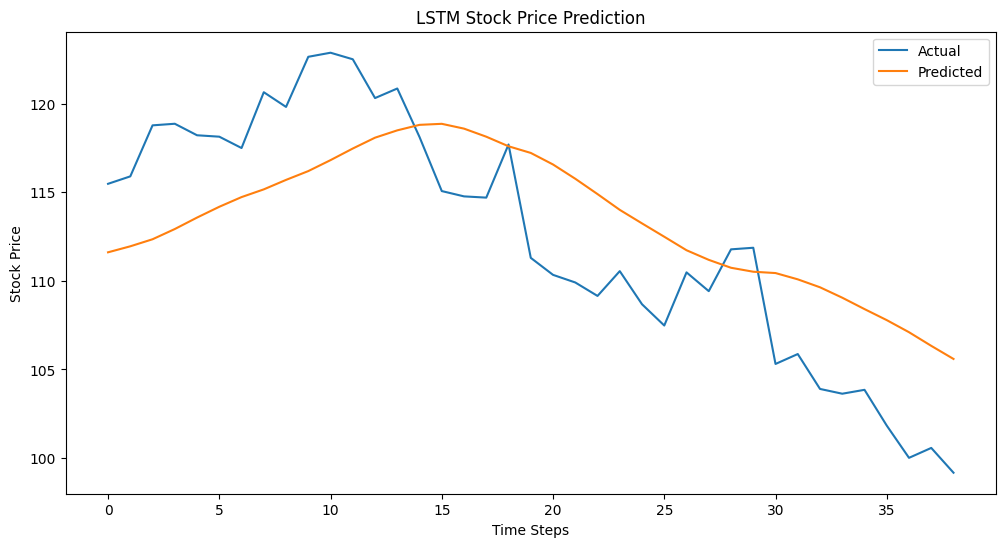

In [ ]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.3298
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0422
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0465
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0210
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0270
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0215
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0214
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0169
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0190
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0155
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0159
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0113
Epoch 13/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0148
Epoch 14/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0149
Epoch 15/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0145
Epoch 16/50
5/5 ━━━━━━━━━━━━━━━━━━

<ipython-input-4-0ddb4b4633e0>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


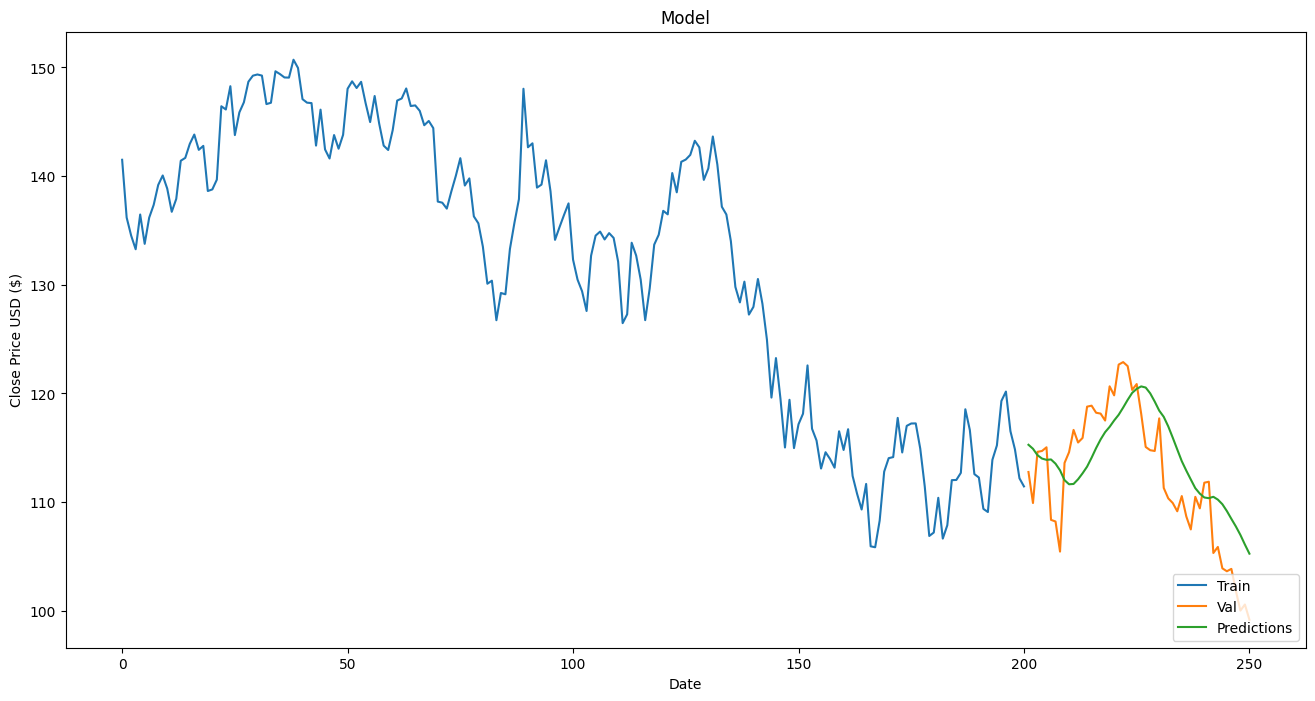

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('GOOG.csv')

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Prepare the training and testing data
training_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to 3 dimensions for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()

# First LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout regularization
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding Dense layer
model.add(Dense(units=25))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with adjusted epochs and batch size
model.fit(x_train, y_train, batch_size=32, epochs=50)

# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = df['Close'][training_data_len:].values

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to 3 dimensions for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


1) What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?

Normalization scales the data to a range between 0 and 1, which helps the model learn more efficiently by ensuring that all inputs have the same scale, reducing the risk of certain features dominating others.

2) What is the purpose of the Dropout layer in the LSTM model?

The Dropout layer is used to prevent overfitting by randomly setting a fraction of input units to 0 at each update during training. This forces the network to learn more robust features.

3) In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

If the predicted line closely follows the actual line, it indicates that the model is performing well and accurately capturing the underlying trend in the stock prices.